# Simple Linear Regression

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
url='https://github.com/TheEconomist/big-mac-data/raw/master/output-data/big-mac-adjusted-index.csv'
df=pd.read_csv(url, parse_dates=['date'])
# df=pd.read_csv(url)
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
0,2011-07-01,ARG,ARS,Argentina,20.00,4.132500,4.839685,9138.177,3.149757,1.011,0.475,0.850,0.906,0.946
1,2011-07-01,AUS,AUD,Australia,4.56,0.922382,4.943724,55589.549,5.792526,0.117,-0.181,0.027,0.059,0.081
2,2011-07-01,BRA,BRL,Brazil,9.50,1.541600,6.162429,10816.487,3.245241,1.485,0.823,1.286,1.356,1.405
3,2011-07-01,GBR,GBP,Britain,2.39,0.614137,3.891637,36119.846,4.684831,0.087,-0.202,0.000,0.031,0.052
4,2011-07-01,CAN,CAD,Canada,4.73,0.945850,5.000793,46214.914,5.259173,0.244,-0.087,0.145,0.180,0.204


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           702 non-null    datetime64[ns]
 1   iso_a3         702 non-null    object        
 2   currency_code  702 non-null    object        
 3   name           702 non-null    object        
 4   local_price    702 non-null    float64       
 5   dollar_ex      702 non-null    float64       
 6   dollar_price   702 non-null    float64       
 7   GDP_dollar     702 non-null    float64       
 8   adj_price      702 non-null    float64       
 9   USD            702 non-null    float64       
 10  EUR            702 non-null    float64       
 11  GBP            702 non-null    float64       
 12  JPY            702 non-null    float64       
 13  CNY            702 non-null    float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 76.9+ KB


In [4]:
df=df[(df['date'].dt.year==2019) & (df['date'].dt.month==1)]
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
554,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,14462.920,3.165211,-0.419,-0.434,-0.338,-0.261,-0.396
555,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,55692.730,4.945273,-0.192,-0.213,-0.080,0.028,-0.160
556,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,9895.765,2.968028,0.406,0.370,0.601,0.789,0.463
557,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,39800.274,4.259130,-0.122,-0.145,0.000,0.117,-0.087
558,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,45094.605,4.487708,0.040,0.013,0.185,0.323,0.082


<Figure size 1152x648 with 0 Axes>

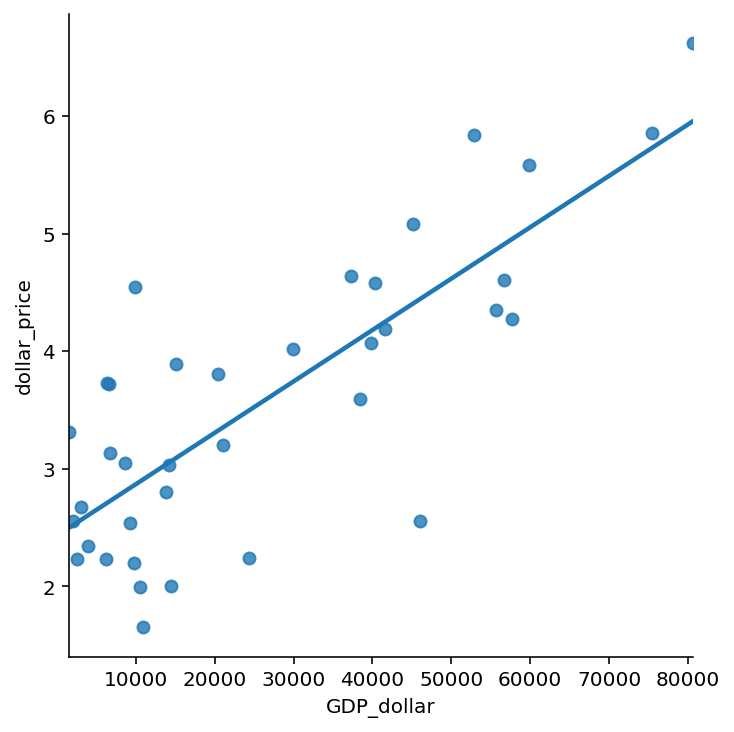

In [10]:
plt.figure(figsize=(16, 9))
sns.lmplot(x='GDP_dollar', y='dollar_price', data=df, ci=None);

## sklearn: LinearRegression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()
model

LinearRegression()

In [21]:
X=df.loc[:,['GDP_dollar']].to_numpy()
y=df.loc[:,['dollar_price']].to_numpy()

In [22]:
model.fit(X, y)

LinearRegression()

In [19]:
model.score(X, y) # R-squared

0.6312750690042253

In [24]:
model.intercept_

array([2.43272716])

In [25]:
model.coef_

array([[4.36961383e-05]])

In [27]:
model.predict([[9000], 
               [40000]])

array([[2.82599241],
       [4.18057269]])

In [28]:
model.predict(np.arange(5000, 50001, 2500).reshape(-1, 1))

array([[2.65120785],
       [2.7604482 ],
       [2.86968854],
       [2.97892889],
       [3.08816924],
       [3.19740958],
       [3.30664993],
       [3.41589027],
       [3.52513062],
       [3.63437096],
       [3.74361131],
       [3.85285166],
       [3.962092  ],
       [4.07133235],
       [4.18057269],
       [4.28981304],
       [4.39905338],
       [4.50829373],
       [4.61753407]])

In [29]:
model.predict(np.linspace(5000, 50000, 20).reshape(-1, 1))

array([[2.65120785],
       [2.75469871],
       [2.85818956],
       [2.96168041],
       [3.06517127],
       [3.16866212],
       [3.27215298],
       [3.37564383],
       [3.47913468],
       [3.58262554],
       [3.68611639],
       [3.78960724],
       [3.8930981 ],
       [3.99658895],
       [4.10007981],
       [4.20357066],
       [4.30706151],
       [4.41055237],
       [4.51404322],
       [4.61753407]])

## Statsmodels: Simple Linear regression

In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [32]:
# formula: response ~ predictor1 + predictor2
model_a = smf.ols(formula='dollar_price ~ GDP_dollar', data=df).fit()

In [34]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:           dollar_price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     59.92
Date:                Thu, 31 Dec 2020   Prob (F-statistic):           4.34e-09
Time:                        14:19:32   Log-Likelihood:                -41.445
No. Observations:                  37   AIC:                             86.89
Df Residuals:                      35   BIC:                             90.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4327      0.195     12.479      0.0

In [35]:
model_a.pvalues

Intercept     1.915703e-14
GDP_dollar    4.338811e-09
dtype: float64

## train-test-split

In [44]:
from sklearn.model_selection import train_test_split

## method 1: split into (train, test)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
model.fit(X_train, y_train) # step 2: fitting model

In [ ]:
model.score(X_test, y_test) # step 3: model scoring

In [ ]:
# step 4: predicting
model.predict([
    [10000],
    [20000],
    [25000]
]) # numpy array: X 2-dim array

In [ ]:
model.intercept_

In [ ]:
model.coef_

$y=\alpha+\beta x$

In [ ]:
model.intercept_ + model.coef_ * 9000

In [ ]:
model.predict([[9000]]) # 2D array

In [ ]:
model.predict([[9000], 
               [40000]])

In [ ]:
np.arange(5000, 50001, 2500)

In [ ]:
np.arange(5000, 50001, 2500).reshape(-1, 1) # 2D

In [ ]:
model.predict(np.arange(5000, 50001, 2500).reshape(-1, 1))

In [ ]:
np.linspace(5000, 50000, 20)

In [ ]:
np.linspace(5000, 50000, 20).reshape(-1, 1)

In [ ]:
model.predict(np.linspace(5000, 50000, 20).reshape(-1, 1))

In [ ]:
s=pd.Series(np.linspace(5000, 50000, 20))
s

In [ ]:
model.predict(s.to_frame())

In [ ]:
dx=pd.DataFrame(np.linspace(5000, 50000, 20), columns=['gdp'])
dx

In [ ]:
model.predict(dx)